In [251]:
#What is to be achieved????

#Get International articles --- done
#Get Statewise articles for India --- done
#Get twitter trends --- done


#for international articles - done for australia,canada and us currently
#for statewise articles - done for all states and Union territories

#twitter trends - get for australia,canada and us
#twitter trends - get for india //ignoring for states as trends are mostly the same for each state as for india.

#Process international articles for getting useable hastags
#Process Statewise articles for india to get useable hastags


#Combine list of twitter and article trend
#one wordCloud for international trends
#one wordcloud for indian trends
#one wordcloud for each respective states and UTs
#final wordCloud consisting of all trends

In [252]:
#necessary libraries

import pprint
import requests
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from twitter import *
import sys
sys.path.append(".")
import config

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raghavendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/raghavendra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [253]:
secret = 'b7d9851f7a01459fb6e160952e93ebdf'
#topics=['business', 'entertainment', 'general', 'health', 'science', 'sports', 'technology']
country=['us','ca','au']


In [254]:
parameters = {
  
    'pageSize': 30,  # maximum is 100
    'apiKey': secret # your own API key
}

In [255]:
name=[]
category=[]
    
url_sources='https://newsapi.org/v2/sources?'
response = requests.get(url_sources, params=parameters)
response_json = response.json()
df_name=pd.DataFrame()
df_category=pd.DataFrame()

for i in response_json['sources']:
    df_name=df_name.append([i['name']])
    df_category=df_category.append([i['category']])
    df_name.reset_index(drop=True,inplace=True)
df_name=df_name.rename(columns={0:'name'})
name.append(df_name['name'].to_list())
df_category.reset_index(drop=True,inplace=True)
df_category=df_category.rename(columns={0:'category'})
category.append(df_category['category'].to_list())

name = [item for sublist in name for item in sublist]
category = [item for sublist in category for item in sublist]
category_dict = {name[i]: category[i] for i in range(len(name))} 

url_df = pd.DataFrame(list(zip(name, category)),columns =['name', 'category']) 

print("list of websites and category")
url_df.head(7)



list of websites and category


,name,category
0,ABC News,general
1,ABC News (AU),general
2,Aftenposten,general
3,Al Jazeera English,general
4,ANSA.it,general
5,Argaam,business
6,Ars Technica,technology


In [256]:
#extracts articles based on country codes
def extract(country_code):
    title=[]
    url=[]
    category=[]
    name=[]
    
    url_country='https://newsapi.org/v2/top-headlines?country='+country_code+'&apiKey='+secret
    df_title=pd.DataFrame()
    df_url=pd.DataFrame()
    df_category=pd.DataFrame()
    df_name=pd.DataFrame()
        
    response = requests.get(url_country, params=parameters)

# Convert the response to JSON format and pretty print it
    response_json = response.json()
    for i in response_json['articles']:
        df_title=df_title.append([i['title']])
        df_url=df_url.append([i['url']])
        df_name=df_name.append([i['source']['name']])
        
        #df_category=df_category.append(pd.Series(topic),ignore_index=True)
    df_title.reset_index(drop=True,inplace=True)
    df_title=df_title.rename(columns={0:'Title'})
    title.append(df_title['Title'].to_list())
    df_url.reset_index(drop=True,inplace=True)
    df_url=df_url.rename(columns={0:'url'})
    url.append(df_url['url'].to_list())
    
    df_name=df_name.rename(columns={0:'name'})
    name.append(df_name['name'].to_list())
    

    name = [item for sublist in name for item in sublist]
   # category = [item for sublist in category for item in sublist]
   # df_category.reset_index(drop=True,inplace=True)
    #df_category=df_category.rename(columns={0:'Title'})
    #category.append(df_category['Title'].to_list())
    title = [item for sublist in title for item in sublist]
    url = [item for sublist in url for item in sublist]
    #category = [item for sublist in category for item in sublist]

    
    for item in name:
        if item in category_dict.keys():
            category.append(category_dict[item])
        else:
            category.append('general')
    df = pd.DataFrame(list(zip(title, url,name,category)),columns =['title', 'url','name','category']) 
    df['country']=country_code
    df=df.head(12)
    
    return df


In [257]:
%%time 
us_df=extract('us')
print("Top 12 US articles")
us_df.head(12)




Top 12 US articles
CPU times: user 81.3 ms, sys: 3.29 ms, total: 84.6 ms
Wall time: 974 ms


,title,url,name,category,country
0,Nelson Mandela's youngest daughter dead at 59 ...,https://www.foxnews.com/world/nelson-mandelas-...,Fox News,general,us
1,Coronavirus Outbreak at U.S. Bases in Japan Ro...,https://www.nytimes.com/2020/07/13/world/asia/...,New York Times,general,us
2,Google launches 2nd-gen Pixel Buds internation...,https://9to5google.com/2020/07/13/google-launc...,9to5google.com,general,us
3,Taliban car bomb attack on Afghan intelligence...,https://www.aljazeera.com/news/2020/07/dozens-...,Al Jazeera English,general,us
4,Moderna Stock Jumps as Analyst Expects the FDA...,https://www.barrons.com/articles/moderna-stock...,Barron's,general,us
5,Pennsylvania cop kneeling on man's neck draws ...,https://www.foxnews.com/us/pennsylvania-allent...,Fox News,general,us
6,"China sanctions Sens. Cruz, Rubio over religio...",https://www.cbsnews.com/news/china-sanctions-u...,CBS News,general,us
7,Judge Orders Halt As Federal Executions Are Se...,https://www.npr.org/2020/07/13/890375338/judge...,NPR,general,us
8,Actress Kelly Preston dies of breast cancer at...,https://www.cbsnews.com/news/kelly-preston-die...,CBS News,general,us
9,WHO warns that coronavirus crisis may get 'wor...,https://www.reuters.com/article/us-health-coro...,Reuters,general,us


In [258]:
aus_df=extract('au')
print("Top 12 Australia articles")
aus_df.head(12)

Top 12 Australia articles


,title,url,name,category,country
0,Merging solar cell and liquid battery produces...,https://www.miragenews.com/merging-solar-cell-...,Mirage News,general,au
1,Breaking News and Live Updates: NSW Government...,https://www.9news.com.au/national/coronavirus-...,9News,general,au
2,Get an Inspire HR fitness tracker for $70 in F...,https://www.engadget.com/fitbit-summer-sale-in...,Engadget,technology,au
3,Leaked emails reveal government knew of proble...,https://www.theage.com.au/national/victoria/le...,The Age,general,au
4,Here's how scientists know the coronavirus cam...,https://theconversation.com/heres-how-scientis...,The Conversation Africa,general,au
5,The UAE's Mars mission seeks to bring Hope to ...,https://theconversation.com/the-uaes-mars-miss...,The Conversation Africa,general,au
6,Canterbury Bulldogs set to announce departure ...,https://wwos.nine.com.au/nrl/canterbury-bulldo...,Nine,general,au
7,Documents reveal AFP's use of controversial fa...,https://www.abc.net.au/news/2020-07-13/afp-use...,ABC News (AU),general,au
8,A LEGO Nintendo Entertainment System + Interac...,https://press-start.com.au/news/nintendo/2020/...,Press Start Australia,general,au
9,"Benjamin Keough, grandson of Elvis Presley, jo...",https://www.heraldsun.com.au/subscribe/news/1/,Herald Sun,general,au


In [259]:

can_df=extract('ca')
print("Top 12 Canada articles")
can_df.head(12)

Top 12 Canada articles


,title,url,name,category,country
0,Ontario set to detail Stage 3 of reopening pla...,https://www.cbc.ca/news/canada/toronto/covid-1...,CBC News,general,ca
1,IHA adds more Kelowna locations to possible CO...,http://globalnews.ca/news/7170130/iha-adds-mor...,Global News,general,ca
2,Stocks Climb to 5-Week High; Dollar Extends Dr...,https://ca.finance.yahoo.com/news/asia-stocks-...,Yahoo Entertainment,general,ca
3,Johnny Depp tells libel trial Amber Heard hit ...,https://www.cbc.ca/news/entertainment/depp-lib...,CBC News,general,ca
4,PM says he 'made a mistake' in not recusing hi...,https://www.ctvnews.ca/politics/pm-says-he-mad...,Ctvnews.ca,general,ca
5,New comet appears in pre-dawn sky above Cranbr...,https://www.nelsonstar.com/news/new-comet-appe...,Nelson Star,general,ca
6,Behind on your PUC bill due to COVID-19? - Soo...,https://www.sootoday.com/coronavirus-covid-19-...,SooToday.com,general,ca
7,Nathan Law: Hong Kong pro-democracy activist r...,https://www.bbc.com/news/world-asia-china-5339...,BBC News,general,ca
8,Actress Kelly Preston Dies After Two-Year Batt...,https://news.google.com/__i/rss/rd/articles/CB...,Google News,general,ca
9,Ubisoft Forward in 4 Minutes - IGN,https://news.google.com/__i/rss/rd/articles/CB...,Google News,general,ca


In [260]:

ind_df=extract('in')
print("Top 12 India articles")
ind_df.head(12)

Top 12 India articles


,title,url,name,category,country
0,Bengaluru lockdown from tomorrow: What will re...,https://www.livemint.com/news/india/bengaluru-...,Livemint,general,in
1,CBSE 10th result 2020 expected soon after boar...,https://www.hindustantimes.com/education/after...,Hindustan Times,general,in
2,Retail inflation stood at 6.09% in the month o...,https://timesofindia.indiatimes.com/business/i...,The Times of India,general,in
3,"Rajasthan Party Pulls Support From Congress, b...",https://www.ndtv.com/india-news/2-mlas-of-bhar...,NDTV News,general,in
4,Manchester City escape Champions League ban af...,https://www.espn.in/football/manchester-city/s...,ESPN India,general,in
5,Russia May Start Phase 3 Trial Of COVID-19 Vac...,https://www.ndtv.com/world-news/coronavirus-ru...,NDTV News,general,in
6,Alia Bhatt’s sister Shaheen Bhatt exposes rape...,https://timesofindia.indiatimes.com/entertainm...,The Times of India,general,in
7,You have time till 30 Sept to rectify incomple...,https://www.livemint.com/money/personal-financ...,Livemint,general,in
8,Coronavirus vaccine: Covid immunity may not la...,https://timesofindia.indiatimes.com/life-style...,The Times of India,general,in
9,OnePlus Buds True Wireless Earphones to Launch...,https://gadgets.ndtv.com/audio/news/oneplus-bu...,NDTV News,general,in


In [261]:
#extracting statewise articles

states_in_india=[
'Assam',
'Andhra Pradesh',
'Arunachal Pradesh',
'Bihar',
'Chhattisgarh',
'Goa',
'Gujarat',
'Haryana',
'Himachal Pradesh',
'Jammu and Kashmir',
'Jharkhand',
'Karnataka',
'Kerala',
'Madhya Pradesh',
'Maharashtra',
'Manipur',
'Meghalaya',
'Mizoram',
'Nagaland',
'Odisha',
'Punjab',
'Rajasthan',
'Sikkim',
'Tamil Nadu',
'Telangana',
'Tripura',
'Uttar Pradesh',
'Uttarakhand',
'West Bengal',
'Andaman and Nicobar Islands',
'Chandigarh',
'Dadar and Nagar Haveli',
'Daman and Diu',
'Delhi',
'Lakshadweep',
'Puducherry'
]

                 


In [262]:
def extract_local():
    article=[]
    st=[]
    for state in states_in_india:
        parameters = {
  
        'pageSize': 30,  # maximum is 100
        'apiKey': secret,
        'sortBy': 'popularity',
        # 'q': 'Bangalore AND Bengaluru'
        #'q': 'Manipur'
        #'q':'Karnataka'
        'qInTitle': state

        }
        
        
        local_article=pd.DataFrame()
        article_state=pd.DataFrame()
        url='https://newsapi.org/v2/everything?'
        response = requests.get(url, params=parameters)
        response_json = response.json()
        for item in response_json['articles']:
            local_article=local_article.append([item['title']])
            article_state=article_state.append([state])
        if(local_article.empty==False):
            local_article.reset_index(drop=True,inplace=True)
            local_article=local_article.rename(columns={0:'title'})
        
            article.append(local_article['title'].to_list())
            article_state.reset_index(drop=True,inplace=True)
            article_state=article_state.rename(columns={0:'state'})
            st.append(article_state['state'].to_list())
    
    
    
    
    article = [item for sublist in article for item in sublist]
    st = [item for sublist in st for item in sublist]
   
    states_df = pd.DataFrame((zip(article,st)),columns =['title', 'state/UT']) 
    return states_df

        

In [263]:
%%time
states_df=extract_local()

KeyError: 'articles'

In [264]:
states_df.head()


,title,state/UT
0,Floods in India's Assam force a million from t...,Assam
1,Floods in India's Assam force a million from t...,Assam
2,Floods in Assam force a million from their hom...,Assam
3,"Live: Assam has 2,338 active Corona cases",Assam
4,22 of 33 Assam districts affected by flood,Assam


In [265]:
states_df.tail()

,title,state/UT
960,COVID-19 death toll rises to 10 in Puducherry,Puducherry
961,One more death takes toll to 11 in Puducherry,Puducherry
962,COVID-19 death toll rises to 18 in Puducherry,Puducherry
963,Case against AIADMK MLA for violating lockdown...,Puducherry
964,Shifting of Goubert Market in Puducherry put o...,Puducherry


In [266]:
states_df[states_df['state/UT']=='Rajasthan']

,title,state/UT
630,Desert clouds: On Rajasthan political crisis,Rajasthan
631,Rajasthan crisis live: Sachin Pilot incommunicado,Rajasthan
632,Rajasthan dist floods canal to check migrant flow,Rajasthan
633,"Rajasthan: Will follow party line, say 3 Cong ...",Rajasthan
634,"Power games in Rajasthan, Cong MLAs meet Gehlo...",Rajasthan
635,‘Rajasthan to focus on health infrastructure’,Rajasthan
636,Special kitchen scheme for poor to be launched...,Rajasthan
637,CPI(M) suspends MLA in Rajasthan for indiscipline,Rajasthan
638,₹6.26 lakh fine imposed for flouting norms in ...,Rajasthan
639,Rajasthan launches initiative to control infec...,Rajasthan


In [267]:
#text preprocessing
def text_preprocessor(df):
    stop_words = set(stopwords.words("english"))

    new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
    stop_words = stop_words.union(new_words)
    corpus = []
    for i in range(0, len(df)):

        text = re.sub('[^a-zA-Z]', ' ', df['title'][i])
        text = text.lower()
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
        text=re.sub("(\\d|\\W)+"," ",text)
        text = text.split()
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  
                stop_words] 
        text = " ".join(text)
        corpus.append(text)
        
        for item in corpus:
            for subitem in item:
                text=" ".join(item)
        
    from sklearn.feature_extraction.text import CountVectorizer
    cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
    X=cv.fit_transform(corpus)
        
    def get_top_n_words(corpus, n=None):
        vec = CountVectorizer().fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in      
                           vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], 
                               reverse=True)
        return words_freq[:n]
        
        
    top_words = get_top_n_words(corpus, n=75)
    top_df = pd.DataFrame(top_words)
        
    top_df=top_df.rename(columns={0:'title',1:'Occurence'})
    return top_df
        

In [268]:
rajasthan_df=states_df[states_df['state/UT']=='Rajasthan']
rajasthan_df.head()
rajasthan_df.reset_index(drop=True,inplace=True)


In [269]:
%%time
can_df=text_preprocessor(can_df)
aus_df=text_preprocessor(aus_df)
us_df=text_preprocessor(us_df)
ind_df=text_preprocessor(ind_df)
raj_df=text_preprocessor(rajasthan_df)


CPU times: user 82 ms, sys: 2.64 ms, total: 84.6 ms
Wall time: 84.1 ms


In [270]:
#twitter extraction
from twitter import *
app_name = 'hastag extracter'
consumer_key = 'JKv3MqdQYRrq98m2uR9bFq4ac'
consumer_secret = 'aE6NLvxSon8FSs52BJYAxpzIvuPwTO6s1v6K3X6nF1go1x9tp9'
access_key, access_secret = oauth_dance(app_name, consumer_key, consumer_secret)


twitter = Twitter(auth = OAuth(access_key,
                  access_secret,
                  consumer_key,
                  consumer_secret))


india=23424848
#uk=23424975
us=23424977
#russia=23424936
australia=23424748
canada=23424775



#bangalore=2295420
results_can = twitter.trends.place(_id = canada)
results_aus = twitter.trends.place(_id = australia)
results_us = twitter.trends.place(_id = us)
results_in = twitter.trends.place(_id = india)


twitter_trends_can=[]
twitter_trends_aus=[]
twitter_trends_us=[]
twitter_trends_ind=[]


for location in results_can:
    for trend in location["trends"]:
        twitter_trends_can.append(trend['name'])
        
for location in results_aus:
    for trend in location["trends"]:
        twitter_trends_aus.append(trend['name'])
        
for location in results_us:
    for trend in location["trends"]:
        twitter_trends_us.append(trend['name'])
        
for location in results_in:
    for trend in location["trends"]:
        twitter_trends_ind.append(trend['name'])
        




Hi there! We're gonna get you all set up to use hastag extracter.
Opening: https://api.twitter.com/oauth/authorize?oauth_token=4tfFdAAAAAABF86-AAABc0lMCEY


In the web browser window that opens please choose to Allow
access. Copy the PIN number that appears on the next page and paste or
type it here:
    
Please enter the PIN: 7852914


In [271]:
#wordcloud generator
def word_gen(df):
    from wordcloud import WordCloud
    text = df['title']

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 1600, height = 1600).generate(' '.join(text))

    # Display the generated image:
    plt.figure(figsize = (8, 8), facecolor = None) 

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [272]:
twitter_trends_can=pd.DataFrame(twitter_trends_can,columns=['title'])
can_df.head()
can_df=can_df.drop(columns=['Occurence'])
can_df.append(twitter_trends_can)

twitter_trends_aus=pd.DataFrame(twitter_trends_aus,columns=['title'])
aus_df.head()
aus_df=aus_df.drop(columns=['Occurence'])
aus_df.append(twitter_trends_aus)

twitter_trends_us=pd.DataFrame(twitter_trends_us,columns=['title'])
us_df.head()
us_df=us_df.drop(columns=['Occurence'])
us_df.append(twitter_trends_us)

twitter_trends_ind=pd.DataFrame(twitter_trends_ind,columns=['title'])
ind_df.head()
ind_df=ind_df.drop(columns=['Occurence'])
ind_df.append(twitter_trends_can)

,title
0,time
1,india
2,may
3,livemint
4,th
...,...
45,#mnwild
46,#LuciferSeason5
47,#LiveAid35
48,#webinar


Canada trends


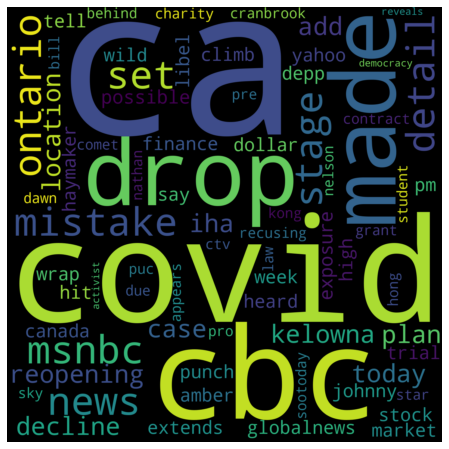

In [273]:
print("Canada trends")
word_gen(can_df)

US trends


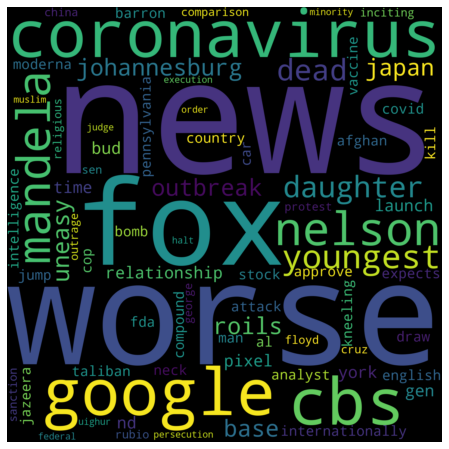

In [274]:
print("US trends")
word_gen(us_df)

Australia trends


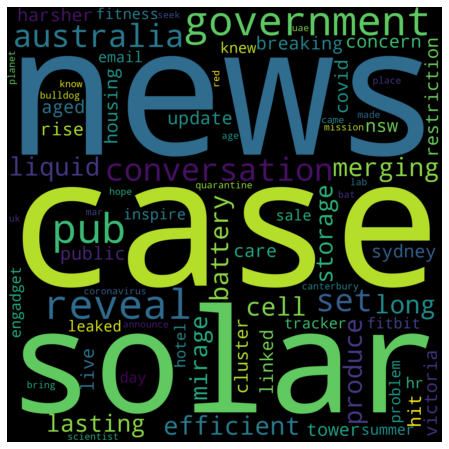

In [275]:
print("Australia trends")
word_gen(aus_df)

India trends


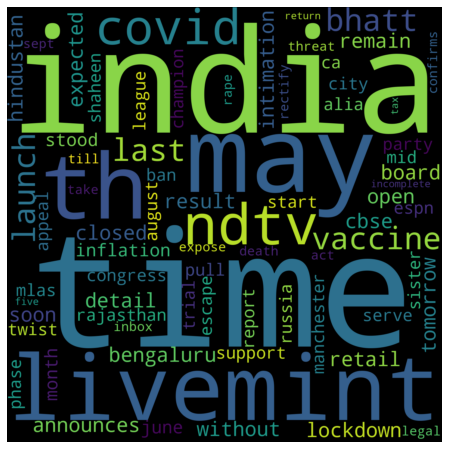

In [276]:
print("India trends")
word_gen(ind_df)

Rajasthan trends


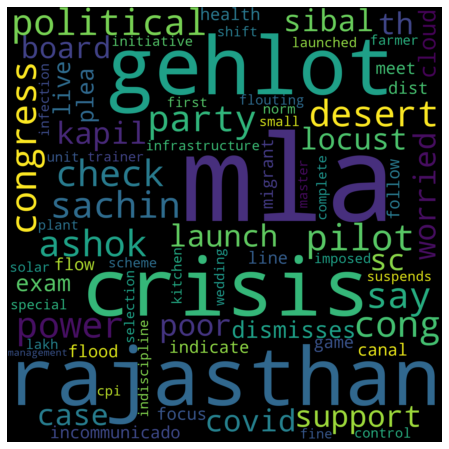

In [277]:
print("Rajasthan trends")
word_gen(raj_df)